### Sympy

El módulo Sympy permite hace cálculo matemático simbólico, del que hacemos en lápiz y papel, pero usando una computadora.

Para usarlo debemos importar el módulo, como hacemos con todos los otros. Como los nombres de las funciones matemáticas suelen coincidir entre módulos, por ejemplo, la funcion `sin` (seno) existe tanto en numpy como en sympy, por lo que se recomienda usar un alias para el módulo.

In [ ]:
import sympy as smp

#### Variables y símbolos

En sympy, nuestras variables tradicionales convien con los llamos `symbols` que son los objetos que sympy usa para calcular. Veamos un ejemplo:

In [ ]:
x,y,z = smp.symbols('x y z')
# a la izquierda variables de python
# a la derecha los objeto symbol de sympy cuyos nombres aparecen en las expresiones
f = x+y+z
f.subs([(x,0),(y,1),(z,6)])


7

In [ ]:
1/x
# x en esta línea es la variable de python, pero lo que imprime sympy
# es la letra que definimos dentro de la función symbols

1/x

In [ ]:
y = smp.symbols('m')
1/y

1/m

Esta evaluación en ocasiones es mejor si usamos`evalf` (si consultamos la ayuda de subs veremos por que´)

``` python

(1/x).evalf(subs={x: 3.0}, n=21)
```

Los resultados obtenidos usando subs, si bien parecen los que se obtendrían de una expresión en python directo, o de numpy, suelen ser mas bien lentos, pero cobran utilidad no cuando solo se desea remplazar algunos valores o hacer una gráfica (veremos más adelante como ir y volver desde el mundo simbólico de sympy al numérico de numpy o matplotlib) sino hacer operaciones de cálculo con ellas.


Conviene siempre que se sepa e dominio de una variable especificarlo, para que sympy no intentente encontrar soluciones que no no nos sirven. Si las variables son reales, no nos interesan soluciones complejas, por ejemplo.

In [ ]:
a = smp.symbols('a0',real=True )
b = smp.symbols('b0',integer=True )
c = smp.symbols('b0',integer=True, possitive=True )

#### Álgebra elemental

Con sympy podemos encontrar soluciones a ecuaciones, factorizar, expandir términos, etc.

[poly](https://docs.sympy.org/latest/modules/polys/reference.html#sympy.polys.polytools.Poly.domain) ayuda

In [ ]:
smp.factor(x**2+2*x-1)
smp.roots(x**2+2*x-1)
smp.factor(x**2+2*x-1,deep=True)

smp.solveset(x**2+2*x-1)
smp.factor(x**2+2*x-1, domain="RR")

smp.Poly(x**2+2*x-1).all_roots()

[-sqrt(2) - 1, -1 + sqrt(2)]

#### Límites, derivadas e integrales

Con sympy podemos resolver *analíticamente* es decir, de forma simbólica (a diferencia de los métodos numéricos que estuvimos viendo hasta ahora) algunas de las operaciones mas usuales del cálculo.



si tenemos lo siguiente

$$
\lim_{x \to \infty} \frac{1}{x}
$$

##### Límites

In [ ]:
x = smp.symbols('x')

smp.limit(1/x,x,smp.oo)

0

In [ ]:
smp.limit(1/x,x,0,dir='-')

-oo

##### Derivadas



In [ ]:
f = x**2
smp.diff(f)

2*x

In [ ]:
g = x**3 + 2*x*y
smp.diff(g,y)

2*x

Podemos hacer derivadas de forma abstracta tambien, suponamos que tenemos una función compuesta,
$$
\frac{\partial}{dx} f(x+g(x))
$$

In [ ]:
f, g = smp.symbols('f g', cls= smp.Function)
g = g(x)
f=f(x+g)

In [ ]:
f

f(x + g(x))

In [ ]:
smp.diff(f,x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

##### Integrales

Sympy puede determinar de antemano si una integral tiene o no una solución analítica conocida.

Si tenemos una función por ejemplo

$$
\int    \frac{\cos(x)}{\sin(x)}
$$


In [ ]:
smp.integrate(smp.csc(x),x)

log(cos(x) - 1)/2 - log(cos(x) + 1)/2

#### Convertir a numpy para usar como función numérica

0.4161468365471424

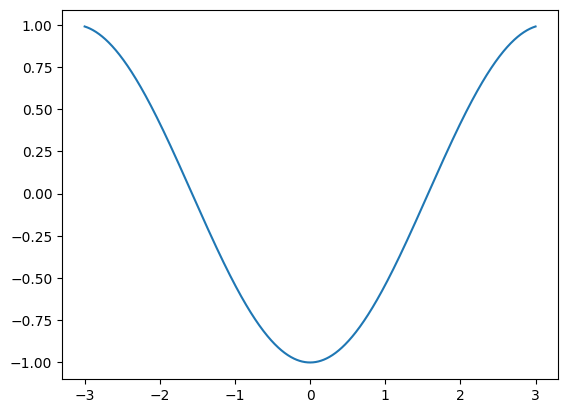

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

solu = smp.lambdify(x, smp.integrate(smp.sin(x),x),'numpy')
t = np.linspace(-3,3,1000)
plt.plot(t,solu(t))
solu(2)


#### Integrales definidas

$$
\int_{0}^{\ln(4)} \frac{e^xdt}{\sqrt {e^{2x}+9}}
$$

In [ ]:
smp.exp(x) / smp.sqrt(smp.exp(2*x)+9)

exp(x)/sqrt(exp(2*x) + 9)

In [ ]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x)+9),(x,0,smp.log(4)))

-asinh(1/3) + asinh(4/3)

#### Integrales impropias

$$
\int_{0}^{\infty} \frac{16 atan(x)}{1+x^2}
$$

In [ ]:
smp.integrate(16*smp.atan(x) / (1+x**2),(x,0,smp.oo))

2*pi**2